### Scikit-learn General framework  

There are several Python libraries which provide solid implementations of a range of machine learning algorithms. One of the best known is [Scikit-Learn](https://scikit-learn.org/stable/), a package that provides efficient versions of a large number of common algorithms. Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation. A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.



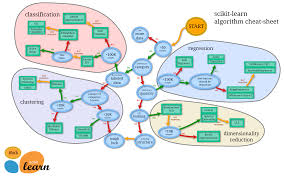

In [2]:
from IPython.display import Image
Image("scikit_ml_cheat_sheet.jpeg", width = "700", height = "700")
#<img src="scikit_ml_cheat_sheet.jpeg" width="600" height="600" align="center"/>

In [1]:
import sklearn
import pandas as pd
import numpy as np

In [2]:
import sklearn
sklearn.__version__

'0.20.3'

#### Starting of with Loading The Data
Your data needs to be numeric and stored as NumPy arrays. Other types that are convertible to numeric arrays, such as Pandas DataFrame, are also acceptable.

In [3]:
import numpy as np
X = np.random.random((10,5))
y = np.array(['M','M','F','F','M','F','M','M','F','F'])

#### Exploration of data

Before we do any modeling using ML algorithms we need to explore the data and make sure that the data is in good shape.

- missing values

- outliers

- categorical variables - conver them to dummy variables

- scaling/ normalization

- 


### Preprocessing The Data




#### Imputing Missing Values

In [8]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=0, strategy='mean', axis=0)
imp.fit_transform(X)

/Users/home/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[0.8832251 , 0.58799779, 0.63171451, 0.20202271, 0.58226787],
       [0.45408949, 0.05346655, 0.86091894, 0.88117033, 0.51988053],
       [0.09872035, 0.57342092, 0.43325927, 0.70388532, 0.91426189],
       [0.5290413 , 0.91078252, 0.35738391, 0.48267793, 0.75862129],
       [0.67102843, 0.00990691, 0.99115493, 0.2243358 , 0.52440262],
       [0.62939836, 0.27971862, 0.09523265, 0.10706032, 0.62551004],
       [0.91095713, 0.48069294, 0.74472629, 0.3205832 , 0.44952064],
       [0.61327541, 0.48746617, 0.56706745, 0.61162011, 0.74714423],
       [0.13119022, 0.45929582, 0.54991322, 0.71012298, 0.11735849],
       [0.16076056, 0.24994409, 0.82412172, 0.77169451, 0.53304591]])

#### Encoding Categorical Features

In [9]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(y)

#### Training And Test Data

Split the data into training and testing 

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

#### Standardization

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
standardized_X = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

#### Normalization

In [12]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X_train)
normalized_X = scaler.transform(X_train)
normalized_X_test = scaler.transform(X_test)

#### Encoding Categorical Features

#### Basics of the API
Most commonly, the steps in using the Scikit-Learn estimator API are as follows.

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the Model to new data:
    - For supervised learning, often we predict labels for unknown data using the predict() method.
    - For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.


### Choose a class of Model

In Scikit-Learn, every class of model is represented by a Python class. So, for example, if we would like to compute a simple linear regression model, we can import the linear regression class.

#### Choose model hyperparameters
An important point is that a class of model is not the same as an instance of a model.

Once we have decided on our model class, there are still some options open to us. Depending on the model class we are working with, we might need to answer one or more questions like the following:

- Would we like to fit for the offset (i.e., y-intercept)?
- Would we like the model to be normalized?
- Would we like to preprocess our features to add model flexibility?
- What degree of regularization would we like to use in our model?
- How many model components would we like to use?

These are examples of the important choices that must be made once the model class is selected. These choices are often represented as hyperparameters, or parameters that must be set before the model is fit to data. In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation.

In [7]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize=True)


# Support Vector Machines

from sklearn.svm import SVC
svc = SVC(kernel='linear')


# Naive Bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# KNN 

from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)


# Principal Component Analysis

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)

# K means

from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0)


Keep in mind that when the model is instantiated, the only action is the storing of these hyperparameter values. In particular, we have not yet applied the model to any data: the Scikit-Learn API makes very clear the distinction between choice of model and application of model to data.

#### Fit the model to your data
Now it is time to apply our model to data. This can be done with the fit() method of the model:

In [8]:
# Model Fitting

lr.fit(X_train,y_train)

knn.fit(X_train, y_train)

svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [9]:
k_means.fit(X_train)
pca_model = pca.fit_transform(X_train)

This fit() command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore. In Scikit-Learn, by convention all model parameters that were learned during the fit() process have trailing underscores; for example in this linear model, we have the following:

In [11]:
print(lr.coef_)

print(lr.intercept_)

[ 0.51563082 -0.75139091  0.51346822  0.7345619   2.03000144]
-0.3062203963236201


One question that frequently comes up regards the uncertainty in such internal model parameters. In general, Scikit-Learn does not provide tools to draw conclusions from internal model parameters themselves: interpreting model parameters is much more a statistical modeling question than a machine learning question. Machine learning rather focuses on what the model predicts. If you would like to dive into the meaning of fit parameters within the model, other tools are available, including the [Statsmodels Python package](https://www.statsmodels.org/stable/index.html).

#### Prediction on new data

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set. In Scikit-Learn, this can be done using the predict() method. For the sake of this example, our "new data" will be a grid of x values, and we will ask what y values the model predicts:

In [12]:
y_pred = svc.predict(np.random.random((2,5)))

y_pred = lr.predict(X_test)


y_pred = knn.predict_proba(X_test)


y_pred = k_means.predict(X_test)



### Evaluate Your Model’s Performance

#### Classification Metrics

In [13]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 1],
       [0, 0]])

In [15]:
# Acuuracy Score
from sklearn.metrics import accuracy_score

print(knn.score(X_test, y_test))

print(accuracy_score(y_test, y_pred))

0.5
0.5


#### Classification Report


In [ ]:
from sklearn.metrics import classification_report
class_rep = classification_report(y_test, y_pred)

### Regression Metrics


In [ ]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
MAE


# Mean Squared Error

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

# Root Mean Squared Error

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

# R2 score

from sklearn.metrics import r2_score
r2score = r2_score(y_test, y_pred)
r2score

### Clustering Metrics


In [ ]:
# Adjusted Rand Index

from sklearn.metrics import adjusted_rand_score
ars = adjusted_rand_score(y_test, y_pred)

# Homogeneity

from sklearn.metrics import homogeneity_score
HS = homogeneity_score(y_true, y_pred)


# V-measure
from sklearn.metrics import v_measure_score
VMS = metrics.v_measure_score(y_true, y_pred)

#### Cross-Validation


In [ ]:
print(cross_val_score(knn, X_train, y_train, cv=4))
CVS = cross_val_score(lr, X, y, cv=2)

#### Save model for future use

In [ ]:
# save model to a .pkl file
from sklearn.externals import joblib

joblib.dump(clf, 'regressor.pkl')

# Loading the model to use 
clf2 = joblib.load('regressor.pkl')

# Predict using loaded model

clf2.predict(X_new_datat)

(<a href="https://scikit-learn.org/stable/tutorial/index.html">Visit for more details sklearn</a>)